### Installing Relevant Libraries

In [1]:
!pip install imblearn

In [2]:
import math
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from  sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
import scipy.spatial.distance as distance


### Data Preprocessing

In [3]:
main =pd.read_csv ("loan_approval_dataset.csv")


In [4]:
main

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
main.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
main[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [8]:
main[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [9]:
main[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

### Encoding the Dataset

In [10]:
main[' education'].replace(to_replace=[' Graduate', ' Not Graduate'], value=[1,0], inplace= True)

In [11]:
main[' self_employed'].replace(to_replace=[' No', ' Yes'], value=[0,1], inplace=True)

In [12]:
main[' loan_status'].replace(to_replace=[' Approved', ' Rejected'], value=[1, 0], inplace=True)

In [13]:
main.drop(["loan_id"], axis=1, inplace=True)

In [14]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [15]:
main.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### Exploratory Data Analysis

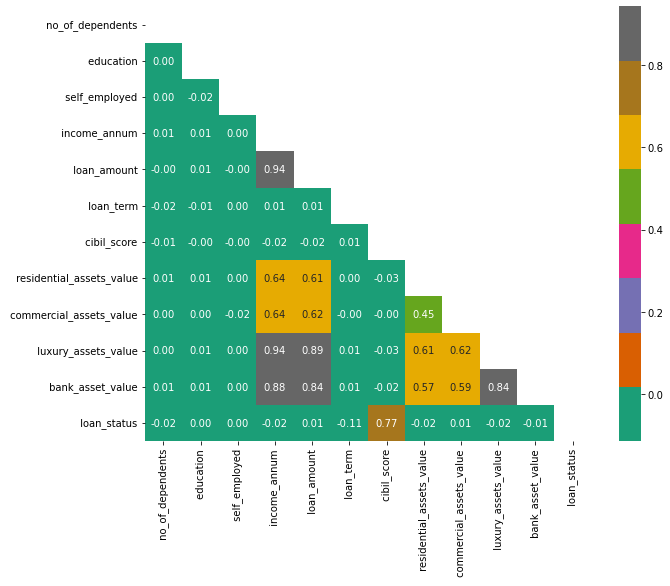

In [16]:
corr=main.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='Dark2', annot=True, fmt='.2f',
mask=np.triu(corr))
plt.show()

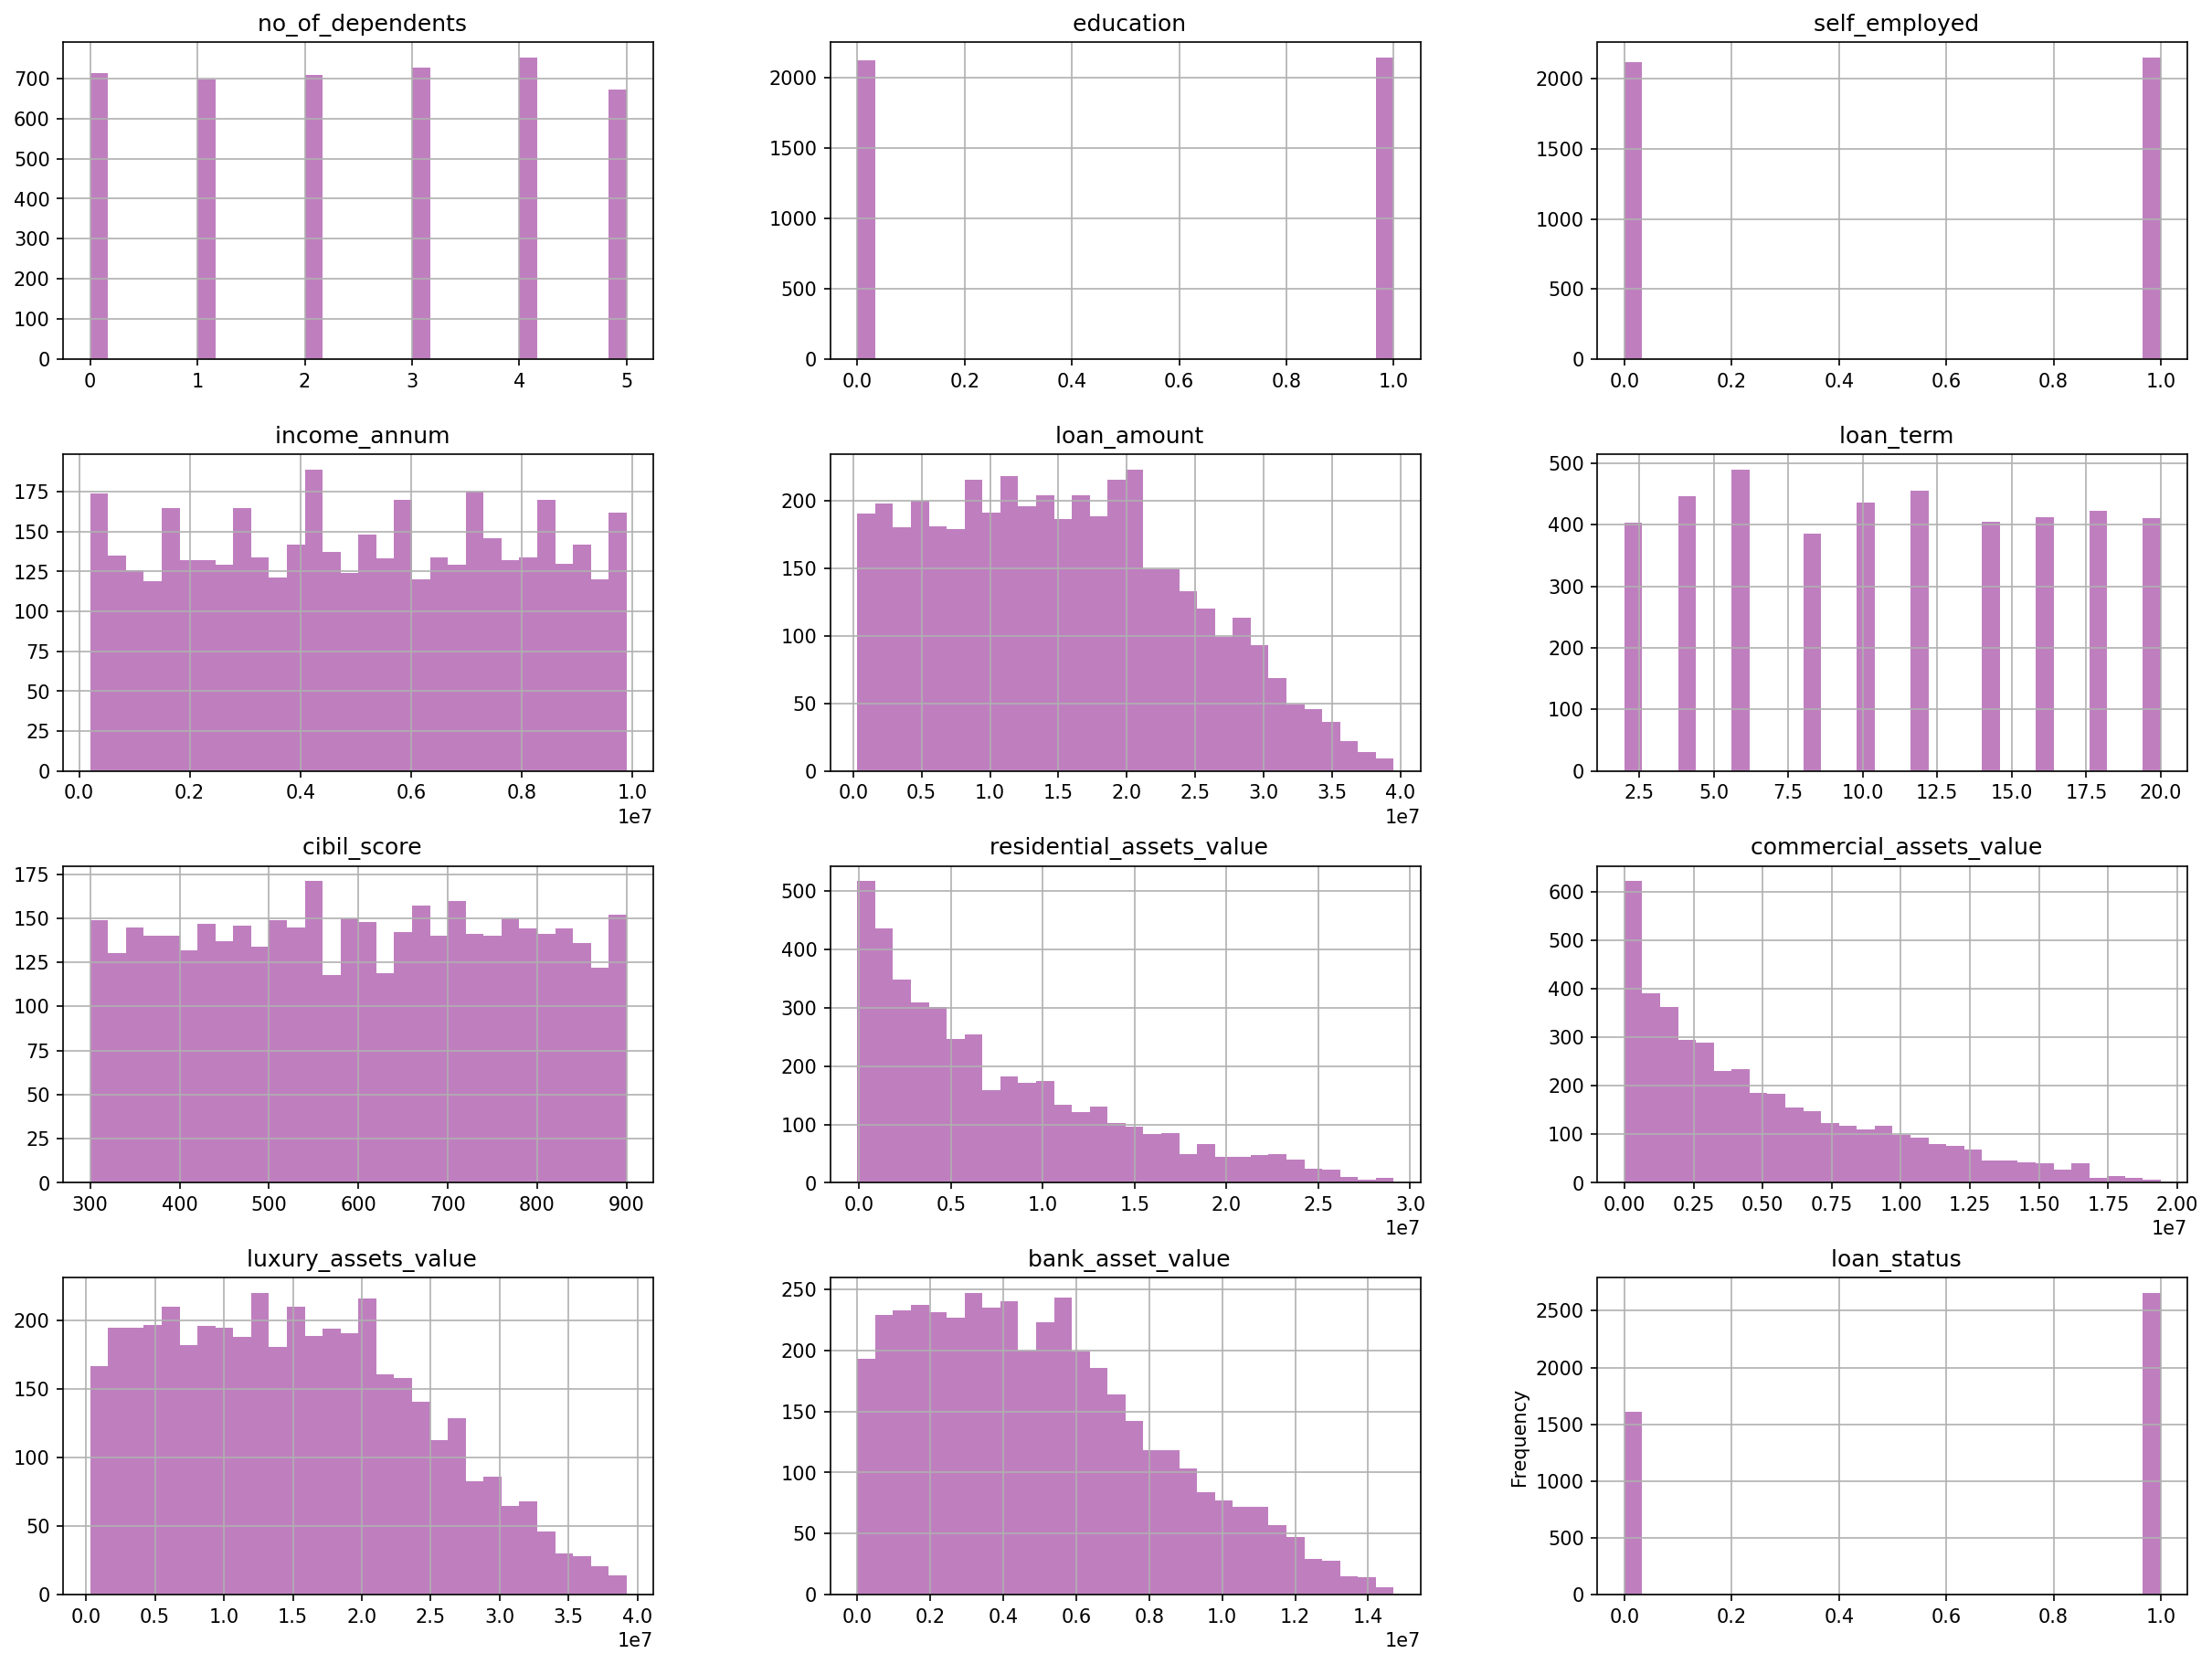

In [17]:
fig,ax=plt.subplots(figsize = (20, 15), dpi = 150)
main.hist(bins = 30, alpha = 0.5, color='purple', ax=ax)
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel=' residential_assets_value'>

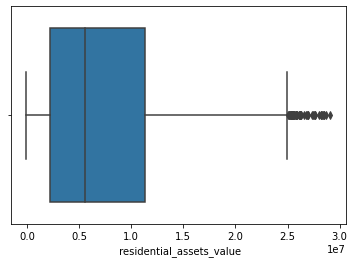

In [18]:
sns.boxplot(main[" residential_assets_value"])

<AxesSubplot:xlabel=' commercial_assets_value'>

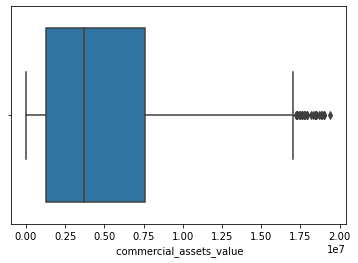

In [19]:
sns.boxplot(main[" commercial_assets_value"]) 

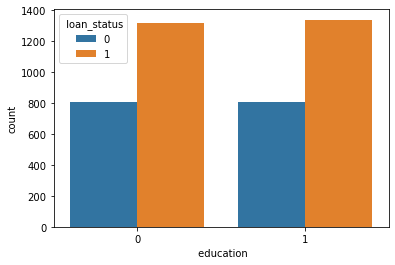

In [20]:
sns.countplot(data=main, x=" education", hue=" loan_status")
plt.show()

<AxesSubplot:xlabel=' loan_term'>

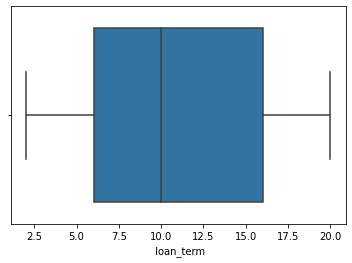

In [21]:
sns.boxplot(main[" loan_term"])

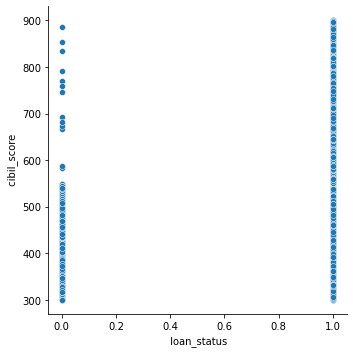

In [22]:
sns.relplot(x =" loan_status", y =" cibil_score",data = main)

<AxesSubplot:xlabel=' luxury_assets_value'>

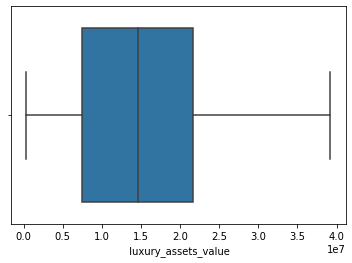

In [23]:
sns.boxplot(main[" luxury_assets_value"])

Text(0.5, 1.0, 'Number of Dependents')

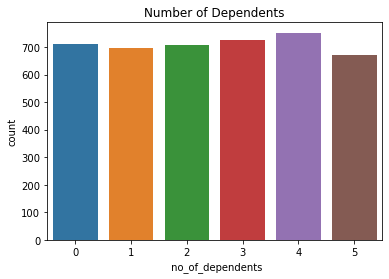

In [24]:
sns.countplot(x = ' no_of_dependents', data = main).set_title('Number of Dependents')

<AxesSubplot:xlabel=' income_annum'>

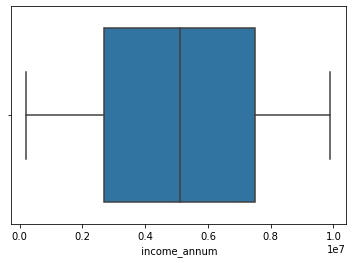

In [25]:
sns.boxplot(main[" income_annum"])

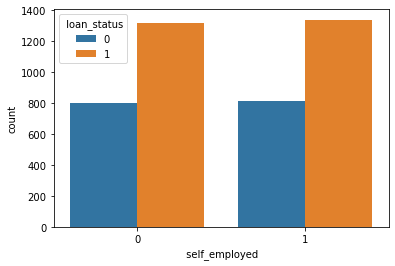

In [26]:
sns.countplot(data=main, x=" self_employed", hue=" loan_status")
plt.show()

<AxesSubplot:xlabel=' bank_asset_value'>

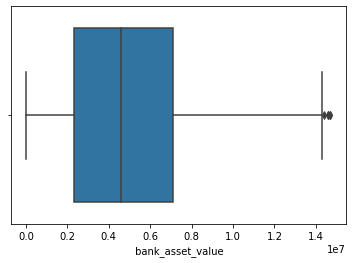

In [27]:
sns.boxplot(main[" bank_asset_value"])

<AxesSubplot:xlabel=' loan_amount'>

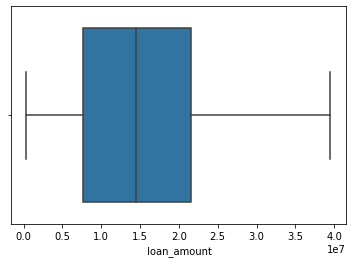

In [28]:
sns.boxplot(main[" loan_amount"])

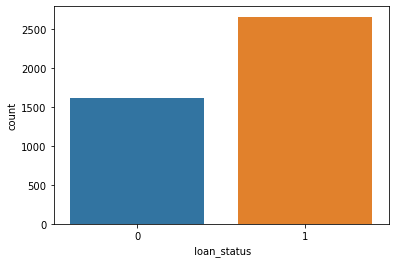

In [29]:
sns.countplot(data=main, x=" loan_status")
plt.show()

In [30]:
X= main.drop(" loan_status", axis = 1)
Y= main[" loan_status"]

### Scalling the Dataset

In [31]:
scalar = MinMaxScaler().fit(X)

In [32]:
main_1 = pd.DataFrame(data=scalar.transform(X), columns=X.columns)

In [33]:
main_1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136
...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,1.0,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422
4265,0.0,0.0,1.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252
4266,0.4,0.0,0.0,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599
4267,0.2,0.0,0.0,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558


### Splitting the Dataset into Training and Testing

In [34]:
X_train, X_test, Y_train, Y_test= train_test_split(main_1, Y, test_size=0.25,random_state=108)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3201, 11) (1068, 11) (3201,) (1068,)


In [35]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)


Shape of X_train: (3201, 11)
Shape of Y_train: (3201,)


In [36]:
Y_train.value_counts()

1    1986
0    1215
Name:  loan_status, dtype: int64

### Creating a Class Weight

In [37]:
class_weights = dict(zip(Y_train.unique(),class_weight.compute_class_weight(class_weight='balanced',classes=Y_train.unique(),y=Y_train)))

In [38]:
class_weights

{1: 0.8058912386706949, 0: 1.317283950617284}

### Implementing the Models

### Random Forest

In [39]:
rf=RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, random_state=108)
rf.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=0.01, n_estimators=10, n_jobs=-1,
                       random_state=108)

In [40]:
train_pred1 = rf.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred1))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred1))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred1))

Accuracy on training data:  0.9693845673227116
Precision on training data: 0.9753272910372608
Recall on training data: 0.9753272910372608


In [41]:
test_pred1=rf.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred1))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred1))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred1))

Accuracy on testing data:  0.9672284644194756
Precision on testing data: 0.96759941089838
Recall on testing data:  0.9805970149253731


### Random Forest Feature Importance

In [42]:
importances = rf.feature_importances_


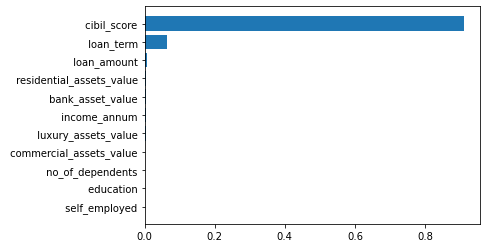

In [43]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])


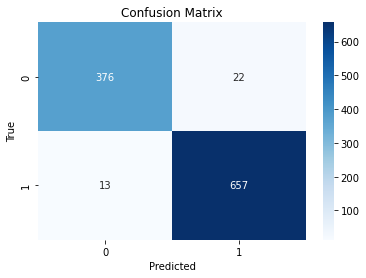

In [44]:

# Calculate and print confusion matrix
conf_matrix1 = confusion_matrix(Y_test, test_pred1)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Random Forest Optimization Using Balanced Weights

In [45]:
rf2=RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, class_weight=class_weights, random_state=108)
rf2.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 1.317283950617284,
                                     1: 0.8058912386706949},
                       min_samples_leaf=0.01, n_estimators=10, n_jobs=-1,
                       random_state=108)

In [46]:
test_pred11=rf2.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred11))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred11))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred11))


Accuracy on testing data:  0.9531835205992509
Precision on testing data: 0.9936305732484076
Recall on testing data:  0.9313432835820895


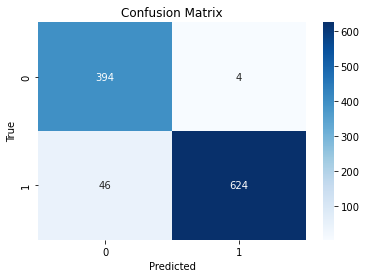

In [47]:

# Calculate and print confusion matrix
conf_matrix11 = confusion_matrix(Y_test, test_pred11)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix11, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [48]:
TN = conf_matrix11[0, 0]
FP = conf_matrix11[0, 1]
FN = conf_matrix11[1, 0]
TP = conf_matrix11[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9532
Classification error : 0.0468
Precision : 0.9936
Recall or Sensitivity : 0.9313
True Positive Rate : 0.9313
False Positive Rate : 0.0101
Specificity : 0.9899


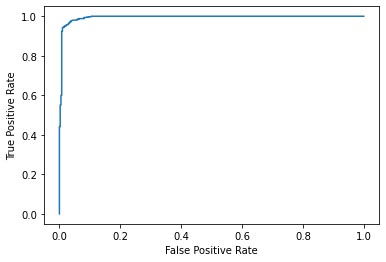

AUC SCORE:0.9942436060901522


In [49]:
test_pred1_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred1_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred1_prob)}')

### Logistics Regression Model

In [50]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression()

Evaluating the Training Data

In [51]:
train_pred2 = log_model.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred2))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred2))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred2))

Accuracy on training data:  0.9172133708216182
Precision on training data: 0.9283225485316078
Recall on training data: 0.9390735146022156


Evaluating the testing Data

In [52]:
test_pred2=log_model.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred2))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred2))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred2))

Accuracy on testing data:  0.9204119850187266
Precision on testing data: 0.9411764705882353
Recall on testing data:  0.9313432835820895


### Feature Importance for Logistics Regression

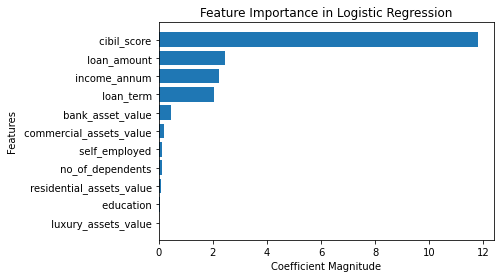

In [53]:

# Get the coefficients (weights) of the logistic regression model
coefficients = log_model.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = np.abs(coefficients)

# Get the indices of features sorted by importance
indices = np.argsort(feature_importance)

# Plotting
fig, ax = plt.subplots()
ax.barh(range(len(feature_importance)), feature_importance[indices])
ax.set_yticks(range(len(feature_importance)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()


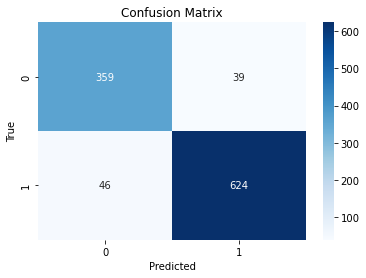

In [54]:

# Calculate and print confusion matrix
conf_matrix2 = confusion_matrix(Y_test, test_pred2)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Optimizing using Balanced Weights for Logistics Regression

In [55]:
log_model = LogisticRegression(class_weight = class_weights)
log_model.fit(X_train, Y_train)


LogisticRegression(class_weight={0: 1.317283950617284, 1: 0.8058912386706949})

In [56]:
test_pred22=log_model.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred22))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred22))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred22))

Accuracy on testing data:  0.9250936329588015
Precision on testing data: 0.9667721518987342
Recall on testing data:  0.9119402985074627


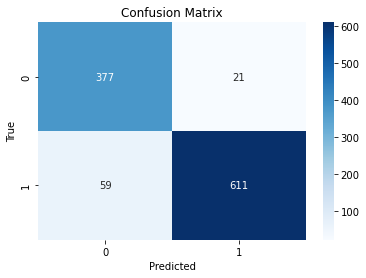

In [57]:

# Calculate and print confusion matrix
conf_matrix22 = confusion_matrix(Y_test, test_pred22)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix22, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
TN = conf_matrix22[0, 0]
FP = conf_matrix22[0, 1]
FN = conf_matrix22[1, 0]
TP = conf_matrix22[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9251
Classification error : 0.0749
Precision : 0.9668
Recall or Sensitivity : 0.9119
True Positive Rate : 0.9119
False Positive Rate : 0.0528
Specificity : 0.9472


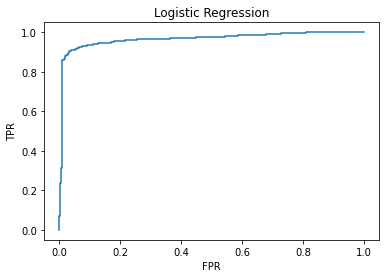

AUC SCORE:0.9661591539788495


In [59]:
cl=[('Logistic Regression',log_model)]
for clf_name,clf in cl:
    clf.fit(X_train,Y_train)
    test_pred2_proba=clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(Y_test,test_pred2_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred2_proba)}')

### Support Vector Machine

In [60]:
svm = SVC(kernel='linear', probability = True)
svm.fit (X_train, Y_train)

SVC(kernel='linear', probability=True)

 Evaluating the Training Data

In [61]:
train_pred3 = svm.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred3))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred3))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred3))

Accuracy on training data:  0.9278350515463918
Precision on training data: 0.9483903934593766
Recall on training data: 0.9345417925478349


Evaluating the testing Data

In [62]:
test_pred3=svm.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred3))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred3))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred3))

Accuracy on testing data:  0.9288389513108615
Precision on testing data: 0.9541284403669725
Recall on testing data:  0.9313432835820895


### Feature Importance for SVM

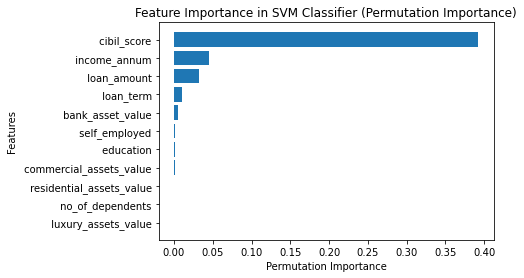

In [63]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained SVM model named 'svm_model' and X_train containing your training data

# Compute permutation importance
perm_importance = permutation_importance(svm, X_train, Y_train, n_repeats=30, random_state=0)

# Get the feature importance scores
feature_importance = perm_importance.importances_mean

# Get the indices of features sorted by importance
indices = np.argsort(feature_importance)

# Plotting
fig, ax = plt.subplots()
ax.barh(range(len(feature_importance)), feature_importance[indices])
ax.set_yticks(range(len(feature_importance)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance in SVM Classifier (Permutation Importance)')
plt.show()


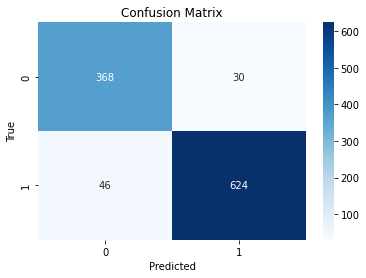

In [64]:

# Calculate and print confusion matrix
conf_matrix3 = confusion_matrix(Y_test, test_pred3)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Optimizing Using Balanced Weights for Support Vector Machine

In [65]:
svm= SVC (class_weight = class_weights)
svm.fit(X_train, Y_train)

SVC(class_weight={0: 1.317283950617284, 1: 0.8058912386706949})

In [66]:
test_pred33=svm.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred33))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred33))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred33))



Accuracy on testing data:  0.9382022471910112
Precision on testing data: 0.9808917197452229
Recall on testing data:  0.9194029850746268


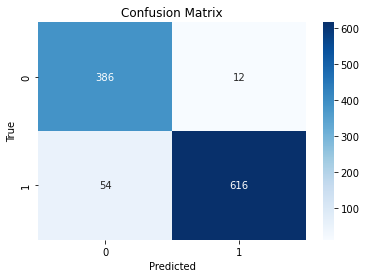

In [67]:

# Calculate and print confusion matrix
conf_matrix33 = confusion_matrix(Y_test, test_pred33)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix33, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [68]:
TN = conf_matrix33[0, 0]
FP = conf_matrix33[0, 1]
FN = conf_matrix33[1, 0]
TP = conf_matrix33[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9382
Classification error : 0.0618
Precision : 0.9809
Recall or Sensitivity : 0.9194
True Positive Rate : 0.9194
False Positive Rate : 0.0302
Specificity : 0.9698


### Naive Bayes Model

In [69]:
Nb = GaussianNB()
Nb.fit(X_train, Y_train)

GaussianNB()

In [70]:
train_pred4 = Nb.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred4))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred4))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred4))


Accuracy on training data:  0.9322086847860044
Precision on training data: 0.9510453850076491
Recall on training data: 0.9390735146022156


In [71]:
test_pred4=Nb.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred4))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred4))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred4))

Accuracy on testing data:  0.9344569288389513
Precision on testing data: 0.9545454545454546
Recall on testing data:  0.9402985074626866


### Feature Importance for Naive Bayes

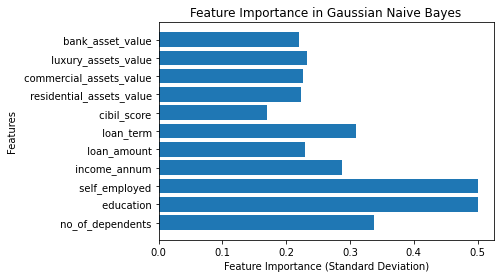

In [72]:

feature_means = Nb.theta_  # Mean of each feature per class
feature_stds = np.sqrt(Nb.sigma_)  # Standard deviation of each feature per class

# Calculate feature importance based on standard deviation across classes
feature_importance = np.mean(feature_stds, axis=0)

# Plotting
fig, ax = plt.subplots()
ax.barh(range(len(feature_importance)), feature_importance)
ax.set_yticks(range(len(feature_importance)))
_ = ax.set_yticklabels(X_train.columns)
plt.xlabel('Feature Importance (Standard Deviation)')
plt.ylabel('Features')
plt.title('Feature Importance in Gaussian Naive Bayes')
plt.show()


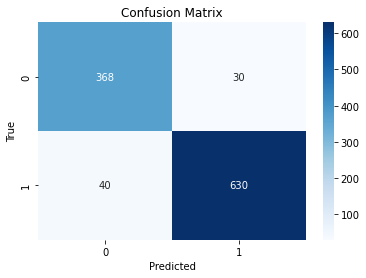

In [73]:

# Calculate and print confusion matrix
conf_matrix4 = confusion_matrix(Y_test, test_pred4)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
TN = conf_matrix4[0, 0]
FP = conf_matrix4[0, 1]
FN = conf_matrix4[1, 0]
TP = conf_matrix4[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9345
Classification error : 0.0655
Precision : 0.9545
Recall or Sensitivity : 0.9403
True Positive Rate : 0.9403
False Positive Rate : 0.0754
Specificity : 0.9246


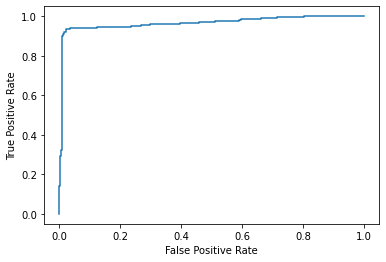

AUC SCORE:0.9657428935723394


In [75]:
test_pred4_prob=Nb.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred4_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred4_prob)}')

### Voting Classifier

In [76]:
estimator = [] 
estimator.append(('Naive Bayes',  
                  GaussianNB())) 
estimator.append(('Random Forest', RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, random_state=108)))
estimator.append(('Logistics Regression',  
                  LogisticRegression())) 

In [77]:
Vc = VotingClassifier(estimators= estimator, voting = 'soft')
Vc.fit(X_train, Y_train)

VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('Random Forest',
                              RandomForestClassifier(min_samples_leaf=0.01,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=108)),
                             ('Logistics Regression', LogisticRegression())],
                 voting='soft')

In [78]:
train_pred5 = Vc.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred5))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred5))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred5))


Accuracy on training data:  0.9562636676038738
Precision on training data: 0.9827405857740585
Recall on training data: 0.946122860020141


In [79]:
test_pred5=Vc.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred5))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred5))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred5))


Accuracy on testing data:  0.9569288389513109
Precision on testing data: 0.984472049689441
Recall on testing data:  0.9462686567164179


### Feature Importance for Voting Classifier

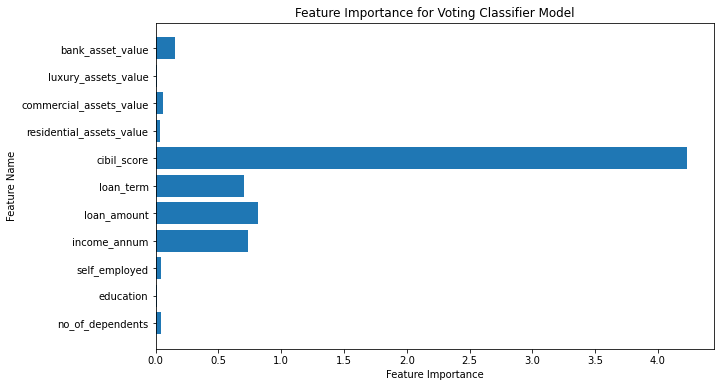

In [80]:
original_feature_names = ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount',
                          'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                          'luxury_assets_value', 'bank_asset_value']

# Calculate feature importance based on individual classifiers
feature_importance = np.zeros(X_train.shape[1])

for clf_name, clf in Vc.named_estimators_.items():
    if hasattr(clf, 'coef_'): 
        feature_importance += np.abs(clf.coef_[0])
    elif hasattr(clf, 'feature_importances_'): 
        feature_importance += clf.feature_importances_

# Normalize feature importance
feature_importance /= len(Vc.estimators_)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importance, align='center')
plt.yticks(range(X_train.shape[1]),original_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Voting Classifier Model')
plt.show()

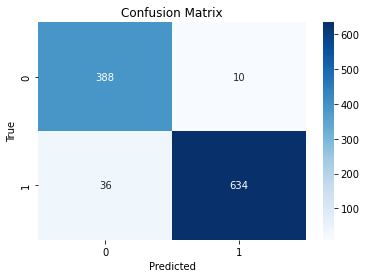

In [81]:

# Calculate and print confusion matrix
conf_matrix5 = confusion_matrix(Y_test, test_pred5)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [82]:
TN = conf_matrix5[0, 0]
FP = conf_matrix5[0, 1]
FN = conf_matrix5[1, 0]
TP = conf_matrix5[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9569
Classification error : 0.0431
Precision : 0.9845
Recall or Sensitivity : 0.9463
True Positive Rate : 0.9463
False Positive Rate : 0.0251
Specificity : 0.9749


### KNN Model 

In [83]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train) 

KNeighborsClassifier(n_neighbors=7)

In [84]:
train_pred6 = knn.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred6))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred6))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred6))


Accuracy on training data:  0.9325210871602624
Precision on training data: 0.9474216380182002
Recall on training data: 0.9436052366565961


In [85]:
test_pred6=knn.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred6))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred6))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred6))


Accuracy on testing data:  0.9166666666666666
Precision on testing data: 0.9316493313521546
Recall on testing data:  0.935820895522388


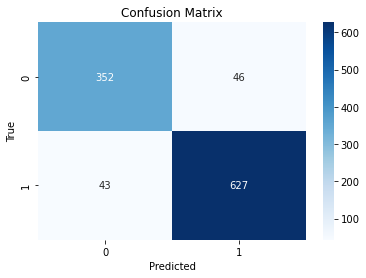

In [86]:

# Calculate and print confusion matrix
conf_matrix6 = confusion_matrix(Y_test, test_pred6)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [87]:
TN = conf_matrix6[0, 0]
FP = conf_matrix6[0, 1]
FN = conf_matrix6[1, 0]
TP = conf_matrix6[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9167
Classification error : 0.0833
Precision : 0.9316
Recall or Sensitivity : 0.9358
True Positive Rate : 0.9358
False Positive Rate : 0.1156
Specificity : 0.8844


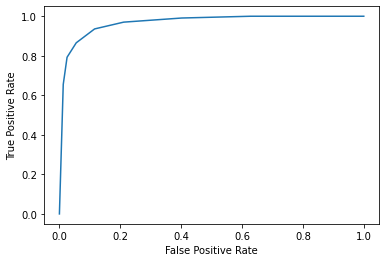

AUC SCORE:0.9677398184954624


In [88]:
test_pred6_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred6_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred6_prob)}')

### Implementing the Deep Learning Algorithms

#### Defining the RBF Neural Network

In [89]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)



In [90]:
# Assigns the scaled training data to the variable maindata.
maindata = X_train_scaled

#  Constructs an array containing the maindata. This will be used as the centroids for the K-means clustering algorithm.
Cent = np.array([maindata])

In [91]:
# Defines the number of clusters (centroids) for the K-means algorithm.
K_clust = 10

# Determines the number of columns (features) in the scaled training data.
column = maindata.shape[1]  # Number of columns in maindata
max_distance = 0

# Loop over centroids
# This code calculates the maximum distance between any two centroids in the dataset and uses it to 
# determine the value of sigma, which is a parameter used in the Radial Basis Function (RBF) kernel.

for i in range(K_clust):
    # Loop over data points
    for j in range(column):
        # Calculate distance between the ith centroid and the jth data point
        d = np.linalg.norm(Cent[0, i] - Cent[0, j])
        if d > max_distance:
            max_distance = d

d = max_distance
sigma = d / np.sqrt(2 * K_clust)

In [92]:
#  Defines the number of clusters (centroids) for K-means clustering.
K_cent= 8

# Initializes the K-means clustering algorithm with the specified number of clusters (K_cent) and maximum number of iterations.
km= KMeans(n_clusters= K_cent, max_iter= 100, random_state=108)

#  Fits the K-means model to the scaled training data, determining the centroids.
km.fit(X_train)
cent= km.cluster_centers_


In [93]:
# This part of the code calculates the maximum distance between any two centroids in the K-means clustering results (cent). 
# This distance is used to determine the value of sigma, which is a parameter in the Radial Basis Function (RBF) kernel.
# K_cent is the number of clusters (centroids) obtained from the K-means clustering.
max=0 
for i in range(K_cent):
    for j in range(K_cent):
        d= numpy.linalg.norm(cent[i]-cent[j])
        if(d> max):
            max= d
d= max

sigma= d/math.sqrt(2*K_cent)

In [94]:
# This section computes the activation matrix G for the RBF neural network. 
# The activation of each neuron (RBF) is calculated based on the distance
# between each data point in the training set (X_train) and the centroids (cent). 
# The activation is determined using the RBF function with the calculated sigma.

X_train_array = X_train.values  # Convert X_train to a NumPy array
shape = X_train_array.shape
row = shape[0]
column = K_cent
G = numpy.empty((row, column), dtype=float)
for i in range(row):
    for j in range(column):
        dist = numpy.linalg.norm(X_train_array[i] - cent[j])
        G[i][j] = math.exp(-math.pow(dist, 2) / math.pow(2 * sigma, 2))

        

In [95]:
# This part of the code computes the weights W for the RBF neural network using a linear least squares approach. 
# It calculates the pseudo-inverse of the matrix GTG (Gramian matrix of G), multiplies it with the transpose of G,
# and then with the target values Y_train 
GTG= numpy.dot(G.T,G)
GTG_inv= numpy.linalg.inv(GTG)
fac= numpy.dot(GTG_inv,G.T)
W= numpy.dot(fac,Y_train)


In [96]:
# This section calculates the activation matrix G_test for the test data (X_test). 
# It follows a similar procedure as before, computing the activation of each neuron (RBF) 
# based on the distance between each data point in the test set and the centroids (cent).
X_test_array = X_test.values  # Convert X_test to a NumPy array
row = X_test_array.shape[0]
column = K_cent
G_test = numpy.empty((row, column), dtype=float)
for i in range(row):
    for j in range(column):
        dist = numpy.linalg.norm(X_test_array[i] - cent[j])
        G_test[i][j] = math.exp(-math.pow(dist, 2) / math.pow(2 * sigma, 2))

        

In [97]:
#Finally, the code computes predictions for the test data by multiplying the activation matrix G_test with the weights W. 
# It then applies a threshold to the predictions, converting them to binary values (0 or 1) using a step function.
prediction= numpy.dot(G_test,W)
prediction= 0.5*(numpy.sign(prediction-0.5)+1)

accuracy = accuracy_score(prediction,Y_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, prediction, average='binary')

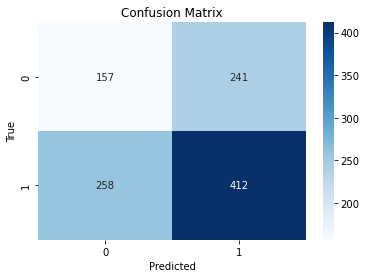

In [98]:
# Calculate and print confusion matrix
conf_matrix7 = confusion_matrix(Y_test, prediction)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [99]:
# Print scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5327715355805244
Precision: 0.6309341500765697
Recall: 0.6149253731343284


### MLP Algorithm

In [100]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', 
                                max_iter=100, random_state=108)

In [101]:
# Train the MLP classifier
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=108)

In [102]:
# Predict on the test set
mlp_pred2 = mlp.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, mlp_pred2))
print("Precision on testing data:", metrics.precision_score(Y_test,mlp_pred2))
print("Recall on testing data: ", metrics.recall_score(Y_test, mlp_pred2))


Accuracy on testing data:  0.9176029962546817
Precision on testing data: 0.946319018404908
Recall on testing data:  0.9208955223880597


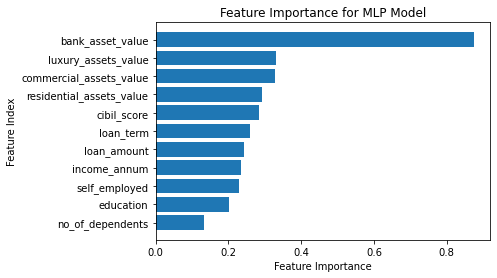

In [103]:
original_feature_names = ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount',
                          'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                          'luxury_assets_value', 'bank_asset_value']
# Get the weights assigned to each feature
weights = mlp.coefs_[0]

# Calculate feature importance based on weights
feature_importance = np.abs(weights).mean(axis=1)

# Get the indices of features sorted by importance
indices = np.argsort(feature_importance)

# Plot feature importance
plt.barh(range(X_train.shape[1]),  feature_importance [indices])
plt.yticks(range(X_train.shape[1]),  original_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance for MLP Model')
plt.show()

In [104]:
print("Classification Report:")
print(classification_report(Y_test, mlp_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       398
           1       0.95      0.92      0.93       670

    accuracy                           0.92      1068
   macro avg       0.91      0.92      0.91      1068
weighted avg       0.92      0.92      0.92      1068



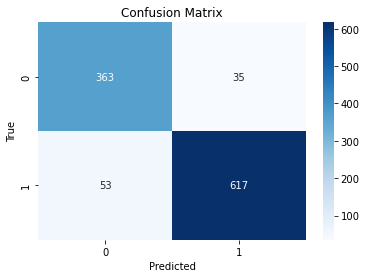

In [105]:
# Calculate and print confusion matrix
conf_matrix8 = confusion_matrix(Y_test, mlp_pred2)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
